## Orthodontic Morph

In [27]:
import cv2
import numpy as np
import sys
from IPython.display import HTML
from matplotlib import pyplot as plt 
from scipy.spatial import Delaunay
import operator
import glob
from skimage import io
import os
import math
from subprocess import Popen, PIPE
from PIL import Image
import random
import subprocess
import argparse
import shutil
import dlib
import imutils

Image source : https://sa1s3optim.patientpop.com/assets/docs/65595.png

file1= 'ortho.png'
imgnew = cv2.imread(file1)
height1, width1 = 267,380
crop_img1 = imgnew[52:52+height1,0:0+width1]
crop_img2 = imgnew[52:52+height1,430:430+width1]
#dst = cv2.resize(crop_img, (width, height), interpolation = cv2.INTER_CUBIC)

filename1 = 'ortho_init.jpg'
cv2.imwrite(filename1, crop_img1) 
filename2 = 'ortho_fin.jpg'
cv2.imwrite(filename2, crop_img2) 

<Figure size 216x288 with 0 Axes>

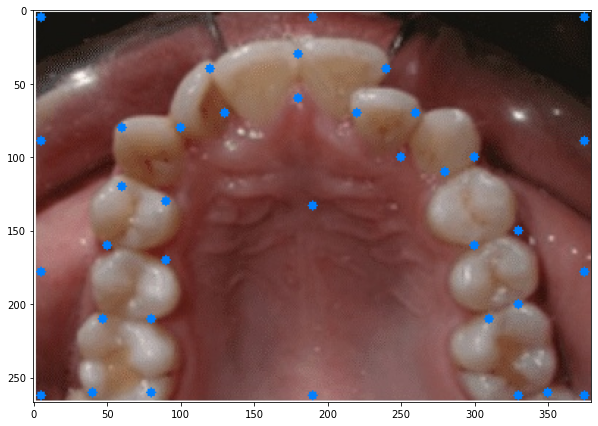

(<matplotlib.image.AxesImage at 0x27c4762ec70>, None)

In [39]:
file1= 'ortho_init.jpg'
imgnew = cv2.imread(file1)
img1 = cv2.imread(file1)
imgnew = cv2.cvtColor(imgnew, cv2.COLOR_RGB2BGR)
imgray =cv2.cvtColor(imgnew, cv2.COLOR_RGB2GRAY)

#pts = np.array([[x,y],[x+10, y], [x,y+32],[x+34,y+52],[x+77,y+32], [x+77, y], [x+87, y], ], np.int32)
pts = np.array([[40, 260],[80,260],
                [47, 210], [80, 210],
               [50, 160], [90, 170],
               [60, 120], [90, 130],
               [60, 80], [100, 80],
               [120, 40], [130, 70],
               [180, 30], [180, 60],
               [240, 40], [220, 70],
               [260, 70], [250, 100],
               [300, 100], [280, 110],
               [330, 150], [300, 160],
               [330, 200], [310, 210],
               [350, 260], [330,262],], np.int32)
plt.figure(figsize=(3,4))

x_corn1=imgnew.shape[1]
y_corn1=imgnew.shape[0]
pts=np.append(pts, [[5, 5],[5, y_corn1-5],[5, y_corn1//3],[5, 2*y_corn1//3], [x_corn1//2, 5],[x_corn1-5, 5],
                            [x_corn1-5, y_corn1//3],[x_corn1-5, 2*y_corn1//3], [x_corn1//2,y_corn1-5],[x_corn1-5,y_corn1-5], [x_corn1//2,y_corn1//2]], axis=0 )

#pts=np.append(pts, [[5, 5],[5, y_corn1-5],[5, y_corn1//2], [x_corn1//2, 5],[x_corn1-5, 5],
#                            [x_corn1-5, y_corn1//2], [x_corn1//2,y_corn1-5],[x_corn1-5,y_corn1-5],[80,200], [80,306]], axis=0 )
plt.figure(figsize=(10,10))
pts.reshape((-1,1,2))

for i1 in pts: 
    x1, y1 = i1.ravel() 
    cv2.circle(imgnew, (x1, y1), 3, (0,127,255), -1) 

plt.imshow(imgnew), plt.show() 

In [40]:
corner_points1=[]
length1=pts.shape[0]
for i in range(length1):
    corner_points1.append(pts[i])
print(np.array(corner_points1))
print(len(corner_points1))

[[ 40 260]
 [ 80 260]
 [ 47 210]
 [ 80 210]
 [ 50 160]
 [ 90 170]
 [ 60 120]
 [ 90 130]
 [ 60  80]
 [100  80]
 [120  40]
 [130  70]
 [180  30]
 [180  60]
 [240  40]
 [220  70]
 [260  70]
 [250 100]
 [300 100]
 [280 110]
 [330 150]
 [300 160]
 [330 200]
 [310 210]
 [350 260]
 [330 262]
 [  5   5]
 [  5 262]
 [  5  89]
 [  5 178]
 [190   5]
 [375   5]
 [375  89]
 [375 178]
 [190 262]
 [375 262]
 [190 133]]
37


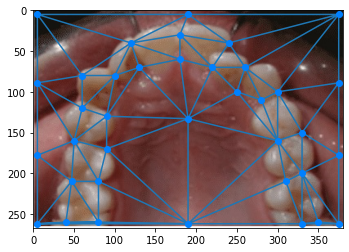

In [41]:
points1 = np.array(corner_points1)
tri1 = Delaunay(points1)
#plt.figure(figsize=(10,20))
im1 = plt.imread(file1)
implot1 = plt.imshow(im1)


plt.triplot(points1[:,0], points1[:,1], tri1.simplices)
plt.plot(points1[:,0], points1[:,1], 'o', color = (0,0.5,1))

plt.xlim(0, img1.shape[1]); plt.ylim(0, img1.shape[0])
plt.gca().invert_yaxis()

plt.show()

In [42]:
np.savetxt('test1.txt', corner_points1, delimiter=' ', fmt='%s')
f1 = open('test1.txt', 'r')
print(f1.read())
f1.close()

40 260
80 260
47 210
80 210
50 160
90 170
60 120
90 130
60 80
100 80
120 40
130 70
180 30
180 60
240 40
220 70
260 70
250 100
300 100
280 110
330 150
300 160
330 200
310 210
350 260
330 262
5 5
5 262
5 89
5 178
190 5
375 5
375 89
375 178
190 262
375 262
190 133



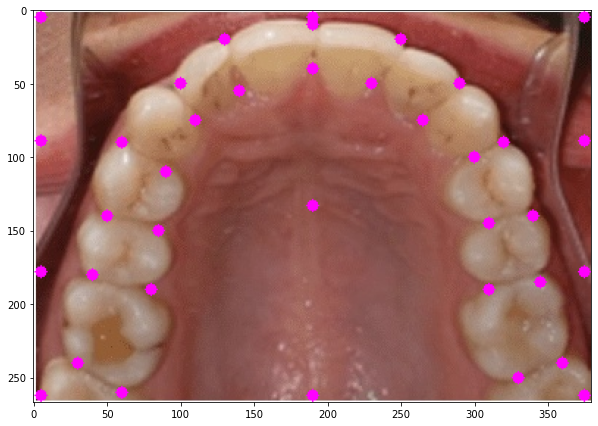

(<matplotlib.image.AxesImage at 0x27c47e52fa0>, None)

In [43]:
file2= 'ortho_fin.jpg'
imgnew2 = cv2.imread(file2)
imgnew2 = cv2.cvtColor(imgnew2, cv2.COLOR_RGB2BGR)
imgray2 =cv2.cvtColor(imgnew2, cv2.COLOR_RGB2GRAY)

#pts = np.array([[x,y],[x+10, y], [x,y+32],[x+34,y+52],[x+77,y+32], [x+77, y], [x+87, y], ], np.int32)
pts2 = np.array([[30,240],[60, 260],
                 [40, 180],[80, 190],
               [50, 140],[85, 150], 
                [60, 90],[90, 110],
               [100, 50], [110, 75], 
               [130, 20], [140, 55],
               [190, 10], [190, 40],
               [250, 20], [230, 50],
               [290, 50], [265, 75],
               [320, 90], [300, 100],
               [340, 140], [310, 145],
               [345, 185], [310, 190],
               [360, 240], [330,250],], np.int32)

plt.figure(figsize=(10,10))

x_corn2=imgnew2.shape[1]
y_corn2=imgnew2.shape[0]
pts2=np.append(pts2, [[5, 5],[5, y_corn2-5],[5, y_corn2//3],[5, 2*y_corn2//3],[x_corn2//2, 5],[x_corn2-5, 5],
                            [x_corn2-5, y_corn2//3],[x_corn1-5, 2*y_corn2//3],[x_corn2//2,y_corn2-5],[x_corn2-5,y_corn2-5],[x_corn2//2,y_corn2//2]], axis=0 )

pts2.reshape((-1,1,2))

for i2 in pts2: 
    x2, y2 = i2.ravel() 
    cv2.circle(imgnew2, (x2, y2), 4, (255,0,255), -1) 

plt.imshow(imgnew2), plt.show() 
#filename = 'recthead-og-points.png' 
#cv2.imwrite(filename,imgnew)

In [44]:
corner_points2=[]
length2=pts2.shape[0]
for i in range(length2):
    corner_points2.append(pts2[i])
print(np.array(corner_points2))
print(len(corner_points2))

[[ 30 240]
 [ 60 260]
 [ 40 180]
 [ 80 190]
 [ 50 140]
 [ 85 150]
 [ 60  90]
 [ 90 110]
 [100  50]
 [110  75]
 [130  20]
 [140  55]
 [190  10]
 [190  40]
 [250  20]
 [230  50]
 [290  50]
 [265  75]
 [320  90]
 [300 100]
 [340 140]
 [310 145]
 [345 185]
 [310 190]
 [360 240]
 [330 250]
 [  5   5]
 [  5 262]
 [  5  89]
 [  5 178]
 [190   5]
 [375   5]
 [375  89]
 [375 178]
 [190 262]
 [375 262]
 [190 133]]
37


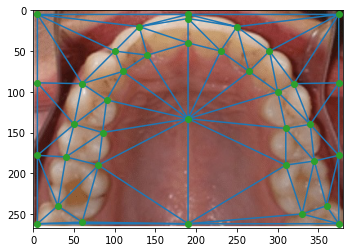

In [45]:
points2 = np.array(corner_points2)
tri2 = Delaunay(points2)

im2 = plt.imread(file2)
implot2 = plt.imshow(im2)

#plt.figure(figsize=(3,4))
plt.triplot(points2[:,0], points2[:,1], tri2.simplices)
plt.plot(points2[:,0], points2[:,1], 'o')

plt.xlim(0, imgnew2.shape[1]); plt.ylim(0, imgnew2.shape[0])
plt.gca().invert_yaxis()

plt.show()


In [46]:
np.savetxt('test2.txt', corner_points2, delimiter=' ', fmt='%s')
f2 = open('test2.txt', 'r')
f2.close()

In [47]:
# Read points from text file
def readPoints(path) :
    # Create an array of points.
    points = [];
    # Read points
    with open(path) as file :
        for line in file :
            x, y = line.split()
            points.append((int(x), int(y)))

    return points

In [48]:
alpha = 0.5
points1 = readPoints('test1.txt')
points2 = readPoints('test2.txt')
points = [];
    
length_p = len(points1)
# Compute weighted average point coordinates
for i in range(0, length_p):
    x = ( 1 - alpha ) * points1[i][0] + alpha * points2[i][0]
    y = ( 1 - alpha ) * points1[i][1] + alpha * points2[i][1]
    points.append((x,y))

points_del = np.array(points)
tri_del = Delaunay(points_del)
final_del=np.array(tri_del.simplices)
np.savetxt('triangle_del_black.txt',final_del, fmt='%s')
print(final_del)

[[34  3 36]
 [23 34 36]
 [29 28  4]
 [29  0 27]
 [ 9 11 36]
 [28  6  4]
 [ 3  5 36]
 [ 1  3 34]
 [ 3  1  0]
 [ 1 34 27]
 [ 0  1 27]
 [32 33 20]
 [14 30 31]
 [16 14 31]
 [34 25 35]
 [23 25 34]
 [ 2  3  0]
 [29  2  0]
 [ 2 29  4]
 [ 5  2  4]
 [ 2  5  3]
 [30 10 26]
 [10 11  9]
 [ 6  8  9]
 [10  8 26]
 [ 8 10  9]
 [ 8 28 26]
 [ 8  6 28]
 [ 6  7  4]
 [ 7  5  4]
 [ 7  6  9]
 [ 7  9 36]
 [ 5  7 36]
 [18 32 20]
 [32 18 31]
 [18 16 31]
 [21 18 20]
 [21 23 36]
 [17 21 36]
 [15 14 16]
 [17 15 16]
 [15 17 36]
 [22 25 23]
 [33 22 20]
 [22 21 20]
 [21 22 23]
 [19 21 17]
 [21 19 18]
 [19 17 16]
 [18 19 16]
 [10 13 11]
 [11 13 36]
 [13 15 36]
 [14 12 30]
 [15 12 14]
 [13 12 15]
 [12 10 30]
 [12 13 10]
 [24 33 35]
 [24 22 33]
 [25 24 35]
 [22 24 25]]


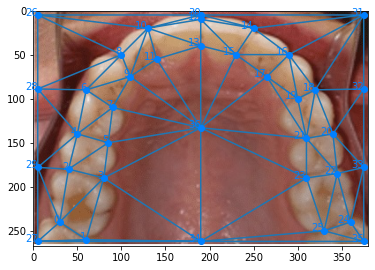

In [49]:
points2 = np.array(corner_points2)
tri2 = Delaunay(points2)

plt.figure(figsize=(6,8))
im2 = plt.imread(file2)
implot2 = plt.imshow(im2)

plt.triplot(points2[:,0], points2[:,1], tri_del.simplices)
plt.plot(points2[:,0], points2[:,1], 'o', color = (0,0.5,1))

for j, p in enumerate(points2):
    plt.text(p[0]-0.03, p[1]+0.03, j, ha='right', color = (0,0.5,1)) # label the points
    
plt.xlim(0, imgnew2.shape[1]); plt.ylim(0, imgnew2.shape[0])
plt.gca().invert_yaxis()

#plt.savefig('rectogdel.jpg', bbox_inches='tight' )

plt.show()


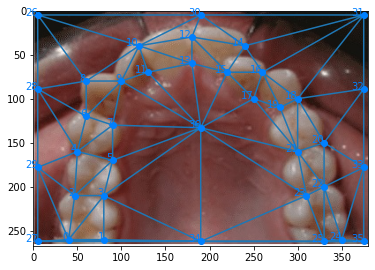

In [50]:
points1 = np.array(corner_points1)
tri1 = Delaunay(points1)
plt.figure(figsize=(6,8))
im1 = plt.imread(file1)
implot1 = plt.imshow(im1)


plt.triplot(points1[:,0], points1[:,1], tri_del.simplices)
plt.plot(points1[:,0], points1[:,1], 'o', color = (0,0.5,1))

for j, p in enumerate(points1):
    plt.text(p[0]-0.03, p[1]+0.03, j, ha='right', color = (0,0.5,1)) # label the points
    
plt.xlim(0, imgnew2.shape[1]); plt.ylim(0, imgnew2.shape[0])
plt.gca().invert_yaxis()

#plt.savefig('rectfindel.jpg', bbox_inches='tight' )
plt.show()



In [51]:
# Apply affine transform calculated using srcTri and dstTri to src and
# output an image of size.
def applyAffineTransform(src, srcTri, dstTri, size) :
    
    # Given a pair of triangles, find the affine transform.
    warpMat = cv2.getAffineTransform( np.float32(srcTri), np.float32(dstTri) )
    
    # Apply the Affine Transform just found to the src image
    dst = cv2.warpAffine( src, warpMat, (size[0], size[1]), None, flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT_101 )

    return dst



In [52]:
# Warps and alpha blends triangular regions from img1 and img2 to img
def morphTriangle(img1, img2, img, t1, t2, t, alpha) :

    # Find bounding rectangle for each triangle
    r1 = cv2.boundingRect(np.float32([t1]))
    r2 = cv2.boundingRect(np.float32([t2]))
    r = cv2.boundingRect(np.float32([t]))
    
    # Offset points by left top corner of the respective rectangles
    t1Rect = []
    t2Rect = []
    tRect = []
    
    for i in range(0, 3):
        tRect.append(((t[i][0] - r[0]),(t[i][1] - r[1])))
        t1Rect.append(((t1[i][0] - r1[0]),(t1[i][1] - r1[1])))
        t2Rect.append(((t2[i][0] - r2[0]),(t2[i][1] - r2[1])))

    # Apply warpImage to small rectangular patches
    img1Rect = img1[r1[1]:r1[1] + r1[3], r1[0]:r1[0] + r1[2]]
    img2Rect = img2[r2[1]:r2[1] + r2[3], r2[0]:r2[0] + r2[2]]
    
    
    # Get mask by filling triangle
    mask = np.zeros((r[3], r[2], 3), dtype = np.float32)
    cv2.fillConvexPoly(mask, np.int32(tRect), (1.0, 1.0, 1.0), 16, 0);
    #print(mask.shape)
    
    size = (r[2], r[3])
    warpImage1 = applyAffineTransform(img1Rect, t1Rect, tRect, size)
    warpImage2 = applyAffineTransform(img2Rect, t2Rect, tRect, size)

    # Alpha blend rectangular patches
    imgRect = (1.0 - alpha) * warpImage1 + alpha * warpImage2
    #imgRect = (1.0) * warpImage1
    #imgRect = (1.0) * warpImage2
    imgRect = imgRect * mask
    
    #print(img[r[1]:r[1]+r[3], r[0]:r[0]+r[2]].shape)
    # Copy triangular region of the rectangular patch to the output image
    img[r[1]:r[1]+r[3], r[0]:r[0]+r[2]] = img[r[1]:r[1]+r[3], r[0]:r[0]+r[2]] * (1 - mask )
    img[r[1]:r[1]+r[3], r[0]:r[0]+r[2]] = img[r[1]:r[1]+r[3], r[0]:r[0]+r[2]] + imgRect
    
    return img


In [53]:
def warpTriangle(img1, img2, tri1, tri2) :
    
    # Find bounding rectangle for each triangle
    r1 = cv2.boundingRect(tri1)
    r2 = cv2.boundingRect(tri2)
    
    # Offset points by left top corner of the respective rectangles
    tri1Cropped = []
    tri2Cropped = []
    
    for i in range(0, 3):
        tri1Cropped.append(((tri1[0][i][0] - r1[0]),(tri1[0][i][1] - r1[1])))
        tri2Cropped.append(((tri2[0][i][0] - r2[0]),(tri2[0][i][1] - r2[1])))

    # Crop input image
    img1Cropped = img1[r1[1]:r1[1] + r1[3], r1[0]:r1[0] + r1[2]]

    # Given a pair of triangles, find the affine transform.
    warpMat = cv2.getAffineTransform( np.float32(tri1Cropped), np.float32(tri2Cropped) )
    
    # Apply the Affine Transform just found to the src image
    img2Cropped = cv2.warpAffine( img1Cropped, warpMat, (r2[2], r2[3]), None, flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT_101 )

    # Get mask by filling triangle
    mask = np.zeros((r2[3], r2[2], 3), dtype = np.float32)
    cv2.fillConvexPoly(mask, np.int32(tri2Cropped), (1.0, 1.0, 1.0), 16, 0);

    img2Cropped = img2Cropped * mask
    
    # Copy triangular region of the rectangular patch to the output image
    #img2[r2[1]:r2[1]+r2[3], r2[0]:r2[0]+r2[2]] = img2[r2[1]:r2[1]+r2[3], r2[0]:r2[0]+r2[2]] * ( (1.0, 1.0, 1.0) - mask )
    
    img2[r2[1]:r2[1]+r2[3], r2[0]:r2[0]+r2[2]] = img2[r2[1]:r2[1]+r2[3], r2[0]:r2[0]+r2[2]] + img2Cropped
    



In [57]:
if __name__ == '__main__' :
    
    img1 = cv2.imread(file1) 
    img2 = cv2.imread(file2) 
    
    # Convert Mat to float data type
    img1 = np.float32(img1)
    img2 = np.float32(img2)
    
    steps = np.linspace(0,1,11)
    #steps = np.linspace(0,1,21, endpoint=False)
    #steps = np.linspace(0,1,11)
    for alpha in steps:
        m=int(alpha*100)
        
        points1 = readPoints('test1.txt')
        points2 = readPoints('test2.txt')
        points = [];
    
    
        length_p = len(points1)
        # Compute weighted average point coordinates
        for i in range(0, length_p):
            x = int(( 1 - alpha ) * points1[i][0] + alpha * points2[i][0])
            y = int(( 1 - alpha ) * points1[i][1] + alpha * points2[i][1])
            points.append((x,y))


        # Allocate space for final output
        imgMorph = 255*np.ones(img1.shape, dtype = img1.dtype)
    
    
        # Read triangles from tri.txt
        with open("triangle_del_black.txt") as file :
            for line in file :
                x,y,z = line.split()
            
                x = int(x)
                y = int(y)
                z = int(z)
            
                t1 = [points1[x], points1[y], points1[z]]
                t2 = [points2[x], points2[y], points2[z]]
                t =  [points[x], points[y], points[z]]
                #Morph one triangle at a time.
                morphTriangle(img1, img2, imgMorph, t1, t2, t, alpha)
              
            
                
        # Display Result
        #cv2.imshow("Morphed Face", np.uint8(imgMorph))
        filename = 'orthomorph'+str(m).zfill(3)+'.jpg'
        cv2.imwrite(filename, imgMorph) 
        #cv2.imshow("Morphed Face1", np.uint8(imgMorph1))
        #cv2.imshow("Morphed Face2", np.uint8(imgMorph2))
        #cv2.waitKey(0)
        file.close()

In [61]:
def generate_video(): 
    image_folder = '.' # make sure to use your folder 
    video_name = 'morthomorph.mp4'
    os.chdir("C:\\Users\\tanya\\Desktop\\FIGHTS\\Impractical") 
      
    images = [img for img in os.listdir(image_folder) 
              if img.endswith(".jpg") and
                 img.startswith("orthomorph")]
     
    # Array images should only consider 
    # the image files ignoring others if any 
    print(images)  
  
    frame = cv2.imread(os.path.join(image_folder, images[0])) 
  
    # setting the frame width, height width 
    # the width, height of first image 
    height, width, layers = frame.shape   
  
    video = cv2.VideoWriter(video_name, 0, 15, (width, height))  
  
    # Appending the images to the video one by one 
    for image in images:  
        video.write(cv2.imread(os.path.join(image_folder, image)))  
    
    # Deallocating memories taken for window creation 
    cv2.destroyAllWindows()  
    video.release()  # releasing the video generated 
  
  
# Calling the generate_video function 
generate_video() 

['orthomorph000.jpg', 'orthomorph010.jpg', 'orthomorph020.jpg', 'orthomorph030.jpg', 'orthomorph040.jpg', 'orthomorph050.jpg', 'orthomorph060.jpg', 'orthomorph070.jpg', 'orthomorph080.jpg', 'orthomorph090.jpg', 'orthomorph100.jpg', 'orthomorphlines000.jpg', 'orthomorphlines010.jpg', 'orthomorphlines020.jpg', 'orthomorphlines030.jpg', 'orthomorphlines040.jpg', 'orthomorphlines050.jpg', 'orthomorphlines060.jpg', 'orthomorphlines070.jpg', 'orthomorphlines080.jpg', 'orthomorphlines090.jpg', 'orthomorphlines100.jpg']


In [59]:
from IPython.display import Video

Video("morthomorph.mp4", embed=True)

In [ ]:
     
# Start coordinate, here (0, 0) 
# represents the top left corner of image 
start_point1 = points1[x]
start_point2 = points1[y]
start_point3 = points1[z]

# End coordinate, here (250, 250) 
# represents the bottom right corner of image 
end_point1 = points[x]
end_point2 = points[y]
end_point3 = points[z]

# Green color in BGR 
color = (255 ,127, 0) 

# Line thickness of 1 px 
thickness = 1

# Using cv2.line() method 
# Draw a diagonal green line with thickness of 9 px 
imgMorph = cv2.arrowedLine(imgMorph, start_point1, end_point1, color, thickness) 
imgMorph = cv2.arrowedLine(imgMorph, start_point2, end_point2, color, thickness) 
imgMorph = cv2.arrowedLine(imgMorph, start_point3, end_point3, color, thickness) 

In [ ]:
file1= 'pekingmask2.jpg'
imgnew = cv2.imread(file1)
height, width = 480,399
crop_img = imgnew[20:450,10:364]
dst = cv2.resize(crop_img, (width, height), interpolation = cv2.INTER_CUBIC)
dst.shape
# Filename 
filename = 'mask2_reshaped.jpg'
  
# Using cv2.imwrite() method 
# Saving the image 
cv2.imwrite(filename, dst) 

In [ ]:
file1= 'pekingmask.jpg'
imgnew = cv2.imread(file1)
crop_img = imgnew[0:480, 40:439]
crop_img.shape
# Filename 
filename = 'mask1_reshaped.jpg'
  
# Using cv2.imwrite() method 
# Saving the image 
cv2.imwrite(filename, crop_img) 